In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
#Check tables in database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
#Check column name and type in 'measurement'
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
#Check column name and type in 'station'
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
#Check data in 'measurement'
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [77]:
#Check data in 'station'
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [9]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
Latest = session.query(Measurement.date).\
order_by(Measurement.date.desc()).first()
Latest

('2017-08-23')

In [81]:
# Calculate the date one year from the last date in data set.

query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print(query_date)

2016-08-23


In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


Selection = [Measurement.date,
             Measurement.prcp]
            

# Perform a query to retrieve the data and precipitation scores
last_year_prec = session.query(*Selection).\
    filter(func.strftime('%Y-%m-%d', Measurement.date) >= '2016-08-23').\
    order_by(Measurement.date.desc()).all()

#last_year_avg_prec

    #group_by(Measurement.date).\

# Save the query results as a Pandas DataFrame and set the index to the date column

prec_df = pd.DataFrame(last_year_prec, columns=['date','prec'])

prec_df = prec_df.set_index('date').sort_index()



# Sort the dataframe by date

#avg_prec_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data


prec_df.head(145)


,prec
date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN
...,...
2016-09-14,1.84
2016-09-14,NaN
2016-09-14,1.19


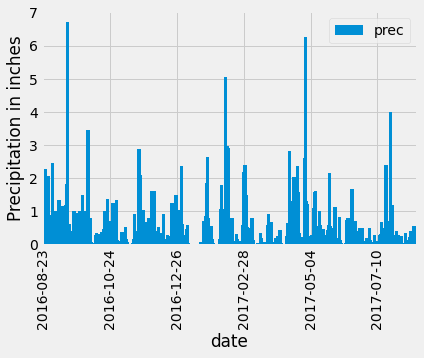

In [33]:
#Plot precipitation data
prec_df.plot.bar(width=20)
x_ticks = np.arange(0, len(prec_df.prec), 400)
plt.xticks(x_ticks)
plt.ylabel('Precipitation in inches')
plt.show()

In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data

quartiles = prec_df.prec.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
mean = round(prec_df.prec.mean(),3)

print(f"The lower precipitation quartile is: {lowerq}")
print(f"The upper precipitation quartile  is: {upperq}")
print(f"The interquartile range of precipitation is: {iqr}")
print(f"The median precipitation is: {quartiles[0.5]} ")
print(f"The mean precipitation is: {mean}")

The lower precipitation quartile is: 0.0
The upper precipitation quartile  is: 0.13
The interquartile range of precipitation is: 0.13
The median precipitation is: 0.02 
The mean precipitation is: 0.177


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).group_by(Measurement.station).count()


9

In [60]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
Stations = [Measurement.station,
            func.count(Measurement.station)]

stations = session.query(*Stations).group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
            
# List the stations and the counts in descending order.

stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [63]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Temps = [Measurement.station, func.min(Measurement.tobs), 
         func.max(Measurement.tobs), func.avg(Measurement.tobs)]

temps = session.query(*Temps).filter(Measurement.station == 'USC00519281').\
        group_by(Measurement.station).all()

temps

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [70]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Last_Year_Temps = [Measurement.date, Measurement.tobs]

last_year_temps = session.query(*Last_Year_Temps).\
    filter(func.strftime('%Y-%m-%d', Measurement.date) >= '2016-08-23').\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()

#last_year_temps

temp_df = pd.DataFrame(last_year_temps, columns=['date','tobs']).set_index('date')

temp_df.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


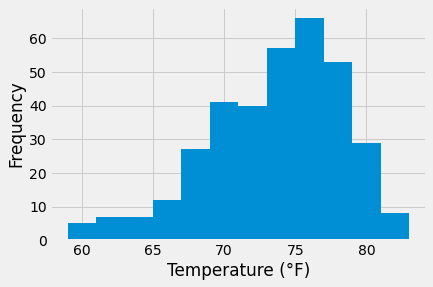

In [73]:
#Plot temp data from last year USC00519281 
plt.hist(temp_df, bins=12)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

# Close session

In [74]:
# Close Session
session.close()